<a href="https://colab.research.google.com/github/desve/vk-text-to-image-demo/blob/main/05_gradio_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/desve/vk-text-to-image-demo.git
%cd vk-text-to-image-demo

Cloning into 'vk-text-to-image-demo'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 152 (delta 7), reused 0 (delta 0), pack-reused 136 (from 1)
Receiving objects: 100% (152/152), 54.20 MiB | 30.18 MiB/s, done.
Resolving deltas: 100% (84/84), done.
/content/vk-text-to-image-demo


Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.safetens(…):   0%|          | 0.00/335M [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/25 [00:00<?, ?it/s]

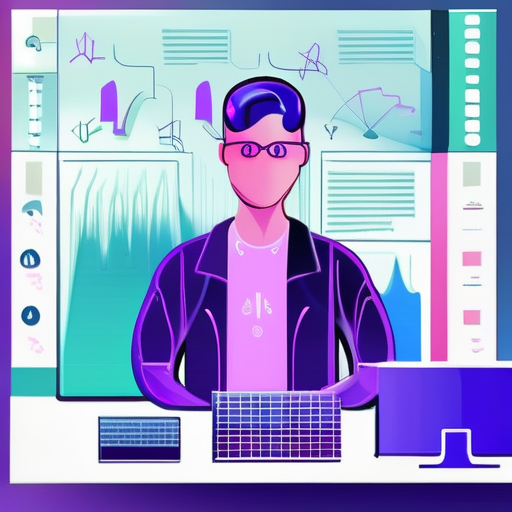

In [3]:
import service_layer

# быстрая проверка
img = service_layer.generate_image_for_app(
    scene_name="Самопрезентация",
    style_key="vk_flat",
    user_text="кот смотрит телевизор",
)
img

# Базовые импорты и переход в папку репо

In [2]:
%cd /content/vk-text-to-image-demo

import service_layer
import gradio as gr

/content/vk-text-to-image-demo


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.safetens(…):   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


# Определяем функцию для Gradio

In [3]:
def generate_image_ui(scene, style, text, steps, guidance):
    """
    Функция-обработчик для Gradio:
    принимает параметры из UI, вызывает сервисный слой и возвращает PIL.Image.
    """
    img = service_layer.generate_image_for_app(
        scene_name=scene,
        style_key=style,
        user_text=text,
        steps=steps,
        guidance=guidance,
        height=512,
        width=512,
    )
    return img

# Описываем минимальный интерфейс Gradio

In [4]:
scenes = [
    "Самопрезентация",
    "Профессиональное достижение",
    "Команда VK",
    "Свободный текст",
]

styles = [
    "vk_flat",
    "neon",
]

with gr.Blocks(title="VK Career Text-to-Image") as demo:
    gr.Markdown("## VK Career Text‑to‑Image\nГенерация иллюстраций по карьерным текстам в стиле VK (SDXL).")

    with gr.Row():
        with gr.Column(scale=1):
            scene_dd = gr.Dropdown(
                label="Сцена",
                choices=scenes,
                value="Самопрезентация",
            )

            style_dd = gr.Dropdown(
                label="Стиль",
                choices=styles,
                value="vk_flat",
            )

            text_box = gr.Textbox(
                label="Текст запроса (RU / EN)",
                placeholder="Например: я выступаю на сцене с пет‑проектом",
                lines=3,
            )

            steps_slider = gr.Slider(
                label="num_inference_steps",
                minimum=10,
                maximum=60,
                value=25,
                step=1,
            )

            guidance_slider = gr.Slider(
                label="guidance_scale",
                minimum=3.0,
                maximum=15.0,
                value=7.5,
                step=0.5,
            )

            generate_btn = gr.Button("Сгенерировать", variant="primary")

        with gr.Column(scale=1):
            output_image = gr.Image(
                label="Результат",
                type="pil",
                interactive=False,
                height=512,
            )

    gr.Markdown("_Проект создан в рамках программы VK Education._")

    generate_btn.click(
        fn=generate_image_ui,
        inputs=[scene_dd, style_dd, text_box, steps_slider, guidance_slider],
        outputs=output_image,
    )

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d72ddaae06cbb88887.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
